In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and Keras for building the neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sklearn for data preprocessing and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppress TensorFlow warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset from orbit.csv
# Make sure the orbit.csv file is uploaded to your Colab environment

# Read the dataset
data = pd.read_csv('orbit.csv')

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(data.head())


First five rows of the dataset:
   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201


In [4]:
# Check for missing values in the dataset
print("\nChecking for missing values:")
print(data.isnull().sum())

# If there are missing values, handle them (e.g., drop or fill)
# For this example, we'll drop any rows with missing values
data = data.dropna()

# Verify that there are no missing values now
print("\nAfter dropping missing values:")
print(data.isnull().sum())



Checking for missing values:
time_steps    0
y             0
dtype: int64

After dropping missing values:
time_steps    0
y             0
dtype: int64


In [5]:
# Extract the input (time_steps) and output (y) variables

# Convert the 'time_steps' column to a NumPy array and reshape it
X = data['time_steps'].values.reshape(-1, 1)

# Convert the 'y' column to a NumPy array
y = data['y'].values.reshape(-1, 1)

# Print the shapes of X and y
print(f"\nShape of input X: {X.shape}")
print(f"Shape of output y: {y.shape}")



Shape of input X: (2000, 1)
Shape of output y: (2000, 1)


In [6]:
# Normalize the input and output data using Min-Max Scaling

# Initialize the scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scalers and transform the data
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)



In [7]:
# Split the dataset into training and testing sets

# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Print the shapes of the training and testing sets
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of X_train: (1600, 1)
Shape of X_test: (400, 1)
Shape of y_train: (1600, 1)
Shape of y_test: (400, 1)


In [8]:
# Build the neural network model suitable for polynomial regression

# Initialize a sequential model
model = Sequential()

# Add input layer and first hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu', input_shape=(1,)))

# Add a second hidden layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Add the output layer with 1 neuron (since we're predicting a single value y)
model.add(Dense(1))

# Compile the model with mean squared error loss and the Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model's architecture
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model

# Train the model for 100 epochs with a validation split of 20%
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1287 - mae: 0.2697 - val_loss: 0.0836 - val_mae: 0.2416
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0985 - mae: 0.2622 - val_loss: 0.0753 - val_mae: 0.2355
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0830 - mae: 0.2459 - val_loss: 0.0686 - val_mae: 0.2291
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0773 - mae: 0.2416 - val_loss: 0.0582 - val_mae: 0.2089
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0602 - mae: 0.2080 - val_loss: 0.0471 - val_mae: 0.1865
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0476 - mae: 0.1817 - val_loss: 0.0346 - val_mae: 0.1543
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351 - mae: 0.1468 - val_loss: 0.0235 - val_mae: 0.1221
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0230 - mae: 0.1160 - val_loss: 0.0156 - val_mae: 0.0982
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.013

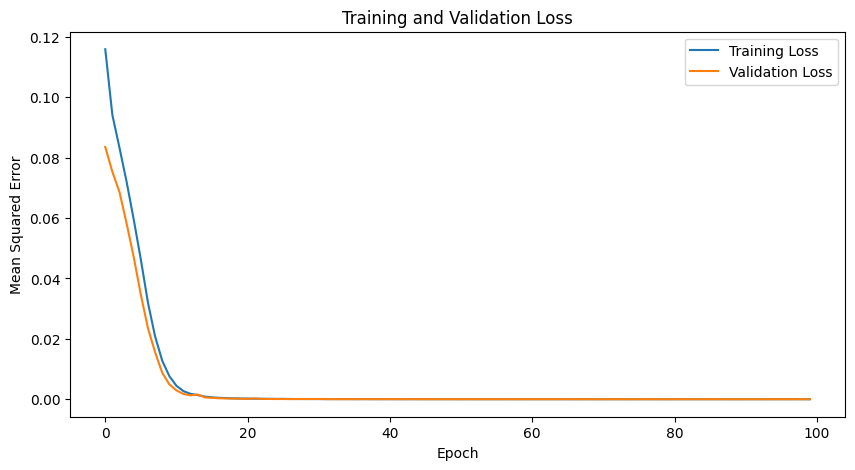

In [10]:
# Plot the training and validation loss over epochs

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [11]:
# Evaluate the model on the test data

# Predict the y values using the test input data
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled data back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate evaluation metrics

# Mean Squared Error
mse = mean_squared_error(y_test_actual, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test_actual, y_pred)

# R-squared Score
r2 = r2_score(y_test_actual, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Mean Squared Error (MSE): 0.0330
Mean Absolute Error (MAE): 0.1384
R-squared Score: 1.0000


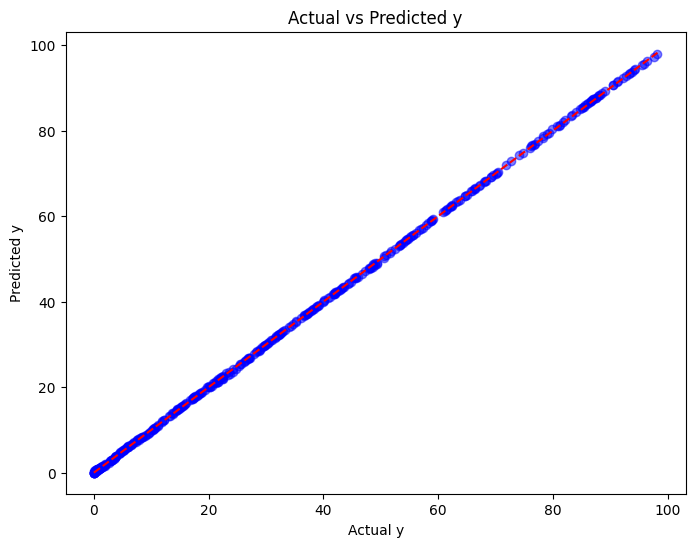

In [12]:
# Save the plot as a PNG image

plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred, alpha=0.5, color='blue')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted y')
plt.savefig('actual_vs_predicted_y.png')
plt.show()


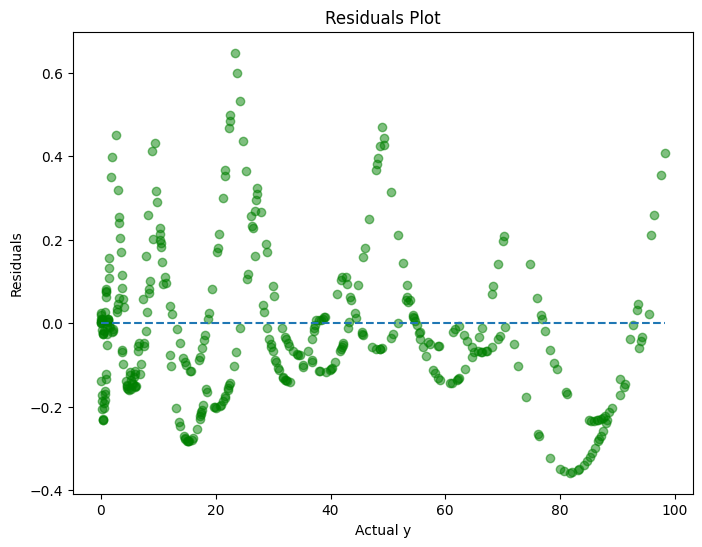

In [14]:
# Plot the residuals (errors)

residuals = y_test_actual - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_test_actual.min(), xmax=y_test_actual.max(), linestyles='dashed')
plt.xlabel('Actual y')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


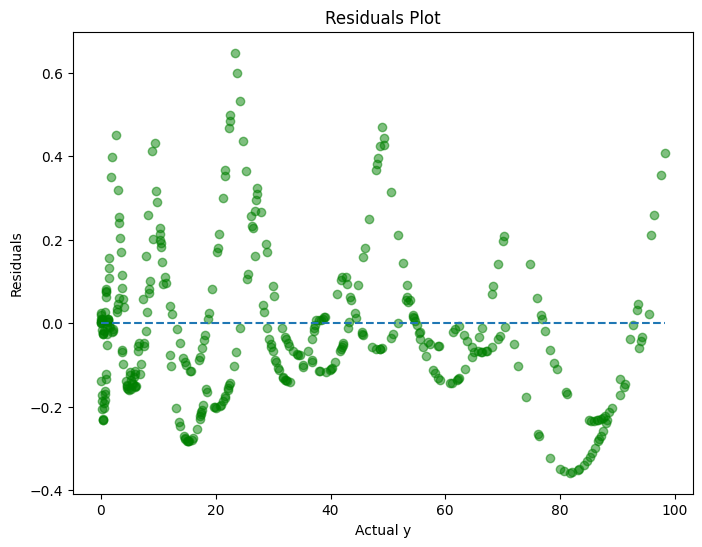

In [15]:
# Save the residuals plot as a PNG image

plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_test_actual.min(), xmax=y_test_actual.max(), linestyles='dashed')
plt.xlabel('Actual y')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.savefig('residuals_plot.png')
plt.show()
